In [19]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
from torchvision import transforms


In [20]:
data = fetch_olivetti_faces()
images = data.images.reshape((-1, 1, 64, 64))
labels = np.arange(len(images))
images_tensor = torch.tensor(images, dtype=torch.float32)
labels_tensor = torch.tensor(data.target, dtype=torch.long)
dataset = torch.utils.data.TensorDataset(images_tensor, labels_tensor)

index_to_split = int(0.2 * len(images))
test_set = torch.utils.data.TensorDataset(images_tensor, labels_tensor)
image, label = test_set[20]
print(image)
print(label)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

tensor([[[0.5785, 0.6033, 0.6322,  ..., 0.2769, 0.2066, 0.1860],
         [0.5537, 0.5785, 0.6116,  ..., 0.2727, 0.1942, 0.1694],
         [0.5331, 0.5826, 0.6033,  ..., 0.2562, 0.1860, 0.1612],
         ...,
         [0.2438, 0.4711, 0.5000,  ..., 0.1446, 0.1653, 0.1653],
         [0.2397, 0.4793, 0.5041,  ..., 0.1488, 0.1694, 0.1694],
         [0.2273, 0.4876, 0.5165,  ..., 0.1777, 0.1612, 0.1529]]])
tensor(2)


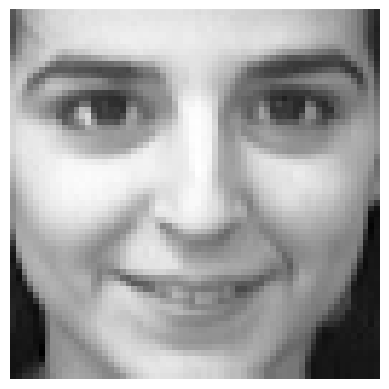

In [21]:
# Display a picture of dataset
def show_picture(picture_index: int):
    image = data.images[picture_index]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
show_picture(91)

In [22]:
# Each picture of the dataset is square 64px x 64px
picture_size = 64

class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc2 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc3 = nn.Linear(picture_size * picture_size, picture_size * picture_size)
        self.fc4 = nn.Linear(picture_size * picture_size, 40)

    def forward(self, x):
        # Forward pass through the layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [24]:
EPOCH = 100

model = CNN_model()
loss_fonct = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(EPOCH): #training
    for batch in train_loader:
        optimizer.zero_grad()
        images, labels = batch
        output = model.forward(images.reshape(images.shape[0], 64 * 64))
        loss = loss_fonct(output, labels)
        loss.backward()
        optimizer.step()
    # print("loss:", loss.item())

total, correct = 0, 0
for image, label in test_set:
    output = model.forward(image.reshape(1, 64 * 64))
    if (output.argmax(dim=1).item() == label):
        correct += 1
    total += 1

print("Accuracy: ", str(correct / total * 100) + "%")
if (correct / total * 100 > 95):
    torch.save(model, 'save/model.pt')

Accuracy:  100.0%


In [ ]:
tensor_image = None

def open_image():
    global tensor_image # Use tensor_image variable to stock picture
    # Enter a file from "picture_data" folder
    file_path = filedialog.askopenfilename(title="Select a picture", filetypes=[("Images", "*.png")])
    if file_path:
        pil_image = Image.open(file_path)
        tk_image = ImageTk.PhotoImage(pil_image)
        image_label.config(image=tk_image)
        image_label.image = tk_image
        tensor_image = transforms.ToTensor()(pil_image)
        image_label.pack()

# Ask for picture
root = tk.Tk()
root.title("Select a picture")
open_button = tk.Button(root, text="Open a picture", command=open_image)
open_button.pack(pady=10)
image_label = tk.Label(root)
image_label.pack()
root.mainloop()